In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
from treehopper.hoppers import hopper, treehopper, RPartition, PCATreePartition
import treehopper.explore as e
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
from ipywidgets import interact
from sklearn.preprocessing import LabelEncoder
from copy import deepcopy

In [6]:
rgauss = np.random.normal(size=(1000,2))


[[ 2.79565721e-01]
 [-1.71586287e+00]
 [-1.29359723e+00]
 [ 3.47842903e-01]
 [-1.51431404e+00]
 [ 4.48215135e-01]
 [ 1.27037388e+00]
 [-8.92259835e-01]
 [ 9.08183416e-01]
 [ 1.68146733e-01]
 [ 2.57612247e-01]
 [ 9.21095419e-01]
 [ 1.17849693e-01]
 [-6.43034621e-01]
 [-1.61558750e+00]
 [ 3.99677877e-02]
 [ 1.42777922e-01]
 [-1.73696300e+00]
 [ 8.77373874e-01]
 [ 8.50643310e-01]
 [ 1.69558070e+00]
 [ 1.57995415e+00]
 [ 1.62074511e+00]
 [-3.58904738e-01]
 [ 3.98451805e-01]
 [-2.55998935e+00]
 [-7.55617997e-01]
 [ 1.51739826e+00]
 [ 1.49049055e+00]
 [ 8.27478450e-01]
 [ 4.65717726e-01]
 [ 7.82576447e-01]
 [-3.90070292e-01]
 [ 9.82923953e-01]
 [-7.96721182e-01]
 [ 4.74871348e-01]
 [-6.66684910e-01]
 [ 7.15515324e-01]
 [-1.07770058e+00]
 [ 1.91779441e-01]
 [ 2.93112973e-02]
 [-2.44859416e-01]
 [-4.89608017e-01]
 [ 1.47682902e-01]
 [ 5.86256135e-01]
 [-5.93089091e-01]
 [ 1.72250663e-02]
 [ 3.95707571e-01]
 [-4.42968536e-01]
 [-2.15980667e+00]
 [-4.49507338e-01]
 [-7.60711845e-01]
 [-5.1099975

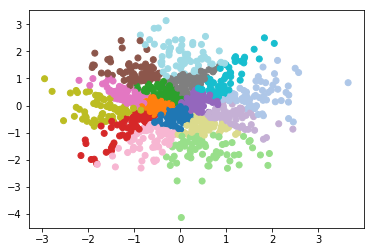

In [10]:
partitions = PCATreePartition(rgauss, max_partition_size=100)
cells = np.array(range(rgauss.shape[0]))
for i,p in enumerate(partitions):
    for row in p:
        cells[row] = i
le = LabelEncoder()
cells = [str(x) for x in cells]
le.fit(cells)
cs = le.transform(cells)
plt.scatter(rgauss[:,0],rgauss[:,1], c=cs, cmap='tab20')

In [81]:
len(np.unique(partitions))

875

Pre-partitioning...
beginning traversal! 63 items to traverse
beginning traversal! 63 items to traverse
beginning traversal! 63 items to traverse
beginning traversal! 63 items to traverse
beginning traversal! 63 items to traverse
beginning traversal! 63 items to traverse
beginning traversal! 63 items to traverse
beginning traversal! 63 items to traverse
beginning traversal! 62 items to traverse
beginning traversal! 62 items to traverse
beginning traversal! 62 items to traverse
beginning traversal! 62 items to traverse
beginning traversal! 62 items to traverse
beginning traversal! 62 items to traverse
beginning traversal! 62 items to traverse
beginning traversal! 62 items to traverse
Pre-partitioning done, added 0 points
0
hopping with 62 points
radius 2.9162277445515112
beginning traversal! 62 items to traverse
checking 2 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


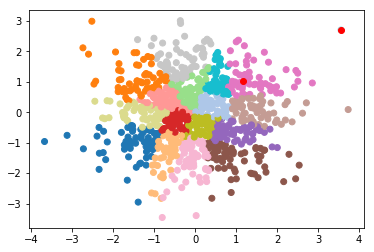

2
hopping with 63 points
radius 2.3015649993482645
beginning traversal! 63 items to traverse
checking 3 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


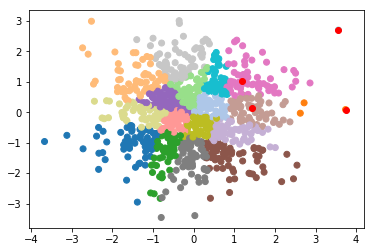

4
hopping with 63 points
radius 2.099845139552355
beginning traversal! 63 items to traverse
checking 6 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


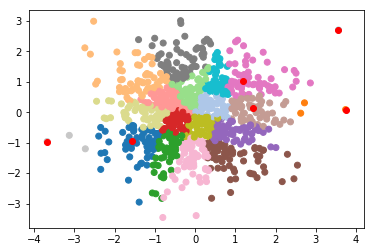

6
hopping with 62 points
radius 2.0173624997814343
beginning traversal! 62 items to traverse
checking 19 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


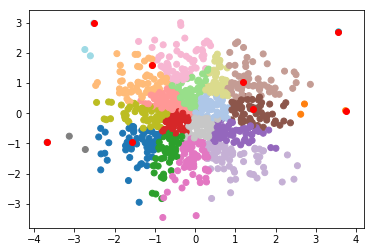

8
hopping with 63 points
radius 2.0079492205628147
beginning traversal! 63 items to traverse
checking 3 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


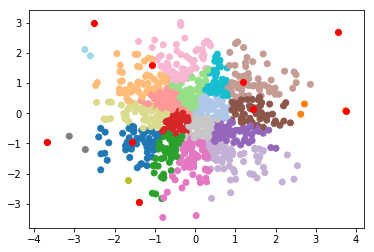

9
hopping with 62 points
radius 1.9154370394260811
beginning traversal! 62 items to traverse
checking 9 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


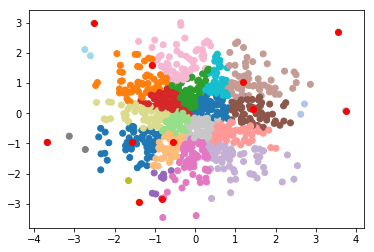

11
hopping with 63 points
radius 1.7091575348676713
beginning traversal! 63 items to traverse
checking 39 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


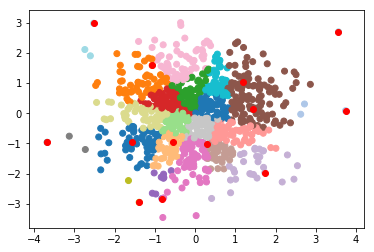

13
hopping with 62 points
radius 1.685944736731845
beginning traversal! 62 items to traverse
checking 15 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


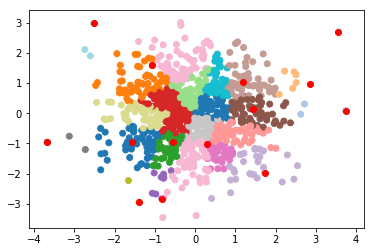

14
hopping with 63 points
radius 1.574770329886345
beginning traversal! 63 items to traverse
checking 15 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


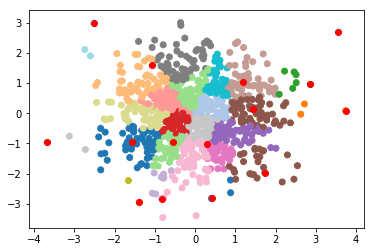

15
hopping with 62 points
radius 1.5512295685791977
beginning traversal! 62 items to traverse
checking 33 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


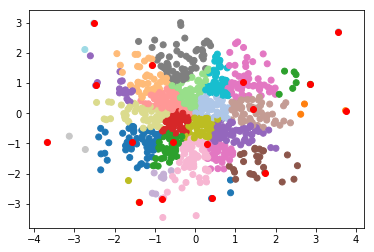

16
hopping with 63 points
radius 1.487552533350301
beginning traversal! 63 items to traverse
checking 37 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]


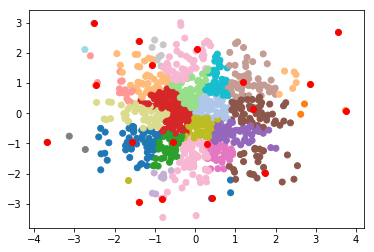

18
hopping with 62 points
radius 1.4290595953923921
beginning traversal! 62 items to traverse
checking 43 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]


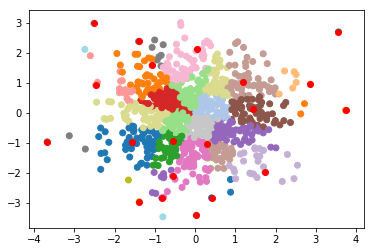

20
hopping with 63 points
radius 1.4042844450012377
beginning traversal! 63 items to traverse
checking 9 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]


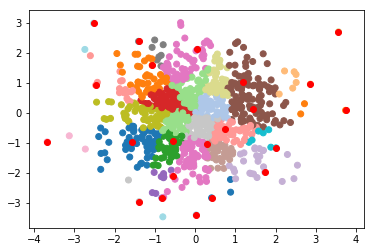

22
hopping with 63 points
radius 1.3732938195414437
beginning traversal! 63 items to traverse
checking 16 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


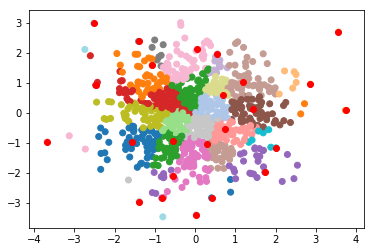

24
hopping with 62 points
radius 1.3514977996796762
beginning traversal! 62 items to traverse
checking 45 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]


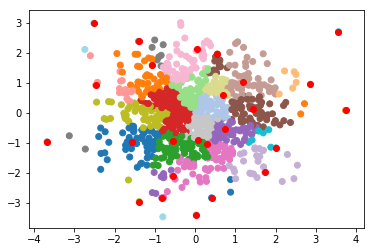

25
hopping with 62 points
radius 1.3507544667923987
beginning traversal! 62 items to traverse
checking 17 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]


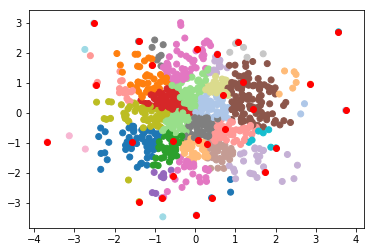

26
hopping with 63 points
radius 1.2982171023892148
beginning traversal! 63 items to traverse
checking 39 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]


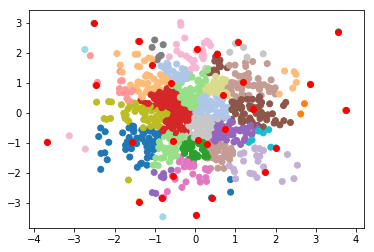

27
hopping with 63 points
radius 1.2011686698571244
beginning traversal! 63 items to traverse
checking 24 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]


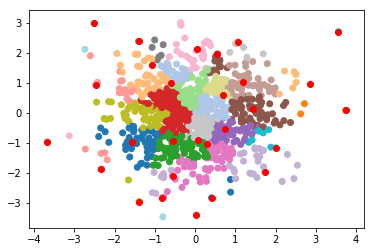

28
hopping with 63 points
radius 1.1206549725488546
beginning traversal! 63 items to traverse
checking 13 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34]


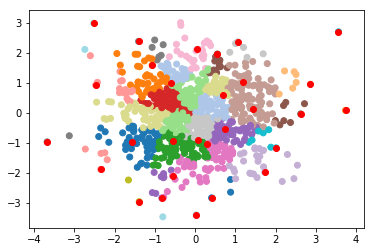

29
hopping with 62 points
radius 1.085997005510539
beginning traversal! 62 items to traverse
checking 36 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]


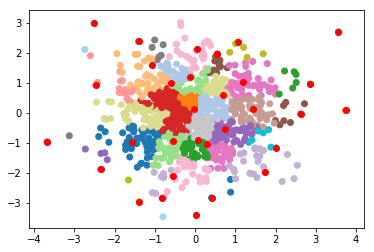

In [22]:
rgauss = np.random.normal(size=(1000,2))
th = treehopper(rgauss, splits=float('inf'), partition=PCATreePartition, max_partition_size=100)
for i in range(20):
    th.hop()
    cells = deepcopy([str(x) for x in th.get_vcells()])
    le = LabelEncoder()
    le.fit(cells)
    cells = le.transform(cells)
    
    #print(cells)
    print(np.unique(cells))
    plt.scatter(rgauss[:,0],rgauss[:,1],c=cells, cmap='tab20')
    plt.scatter(rgauss[th.path,0],rgauss[th.path,1],color='red')
    plt.show()

beginning traversal! 1000 items to traverse
[0]


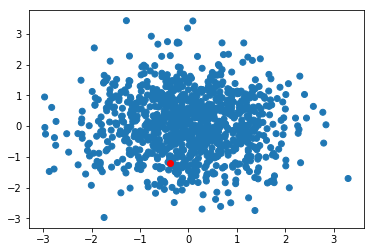

beginning traversal! 1000 items to traverse
checking 231 points
[0 1]


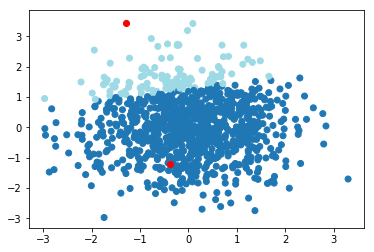

beginning traversal! 1000 items to traverse
checking 361 points
[0 1 2]


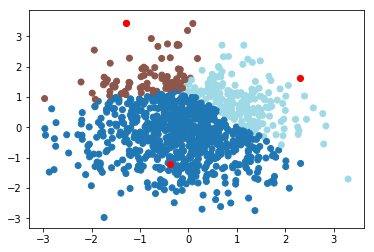

beginning traversal! 1000 items to traverse
checking 360 points
[0 1 2 3]


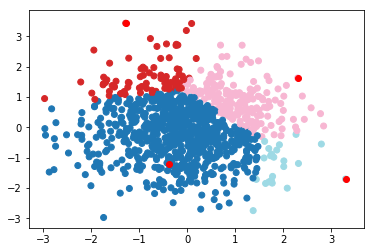

beginning traversal! 1000 items to traverse
checking 511 points
[0 1 2 3 4]


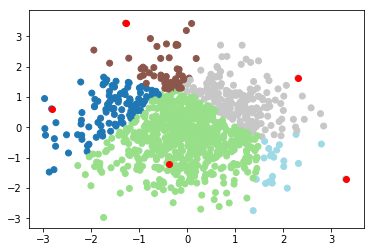

beginning traversal! 1000 items to traverse
checking 667 points
[0 1 2 3 4 5]


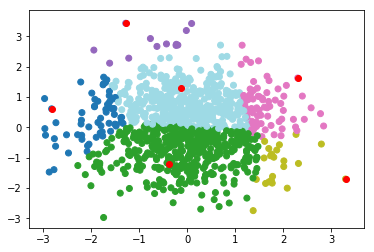

beginning traversal! 1000 items to traverse
checking 443 points
[0 1 2 3 4 5 6]


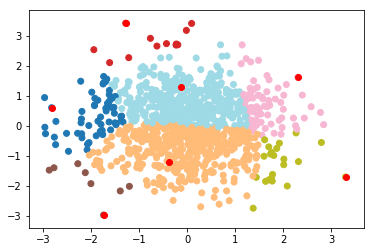

beginning traversal! 1000 items to traverse
checking 462 points
[0 1 2 3 4 5 6 7]


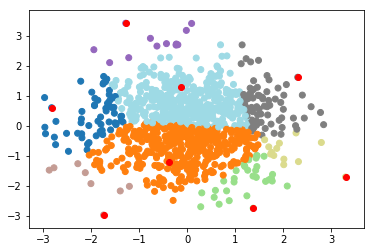

beginning traversal! 1000 items to traverse
checking 497 points
[0 1 2 3 4 5 6 7 8]


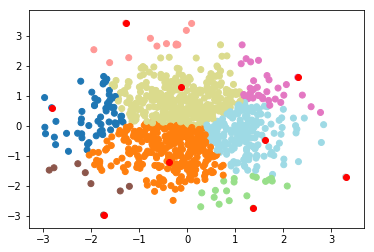

beginning traversal! 1000 items to traverse
checking 490 points
[0 1 2 3 4 5 6 7 8 9]


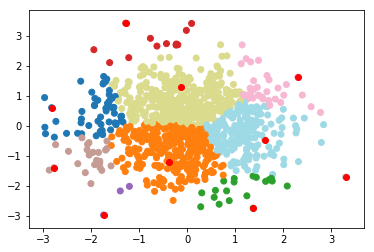

beginning traversal! 1000 items to traverse
checking 613 points
[ 0  1  2  3  4  5  6  7  8  9 10]


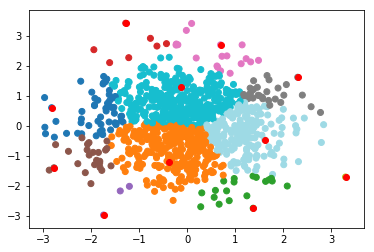

beginning traversal! 1000 items to traverse
checking 633 points
[ 0  1  2  3  4  5  6  7  8  9 10 11]


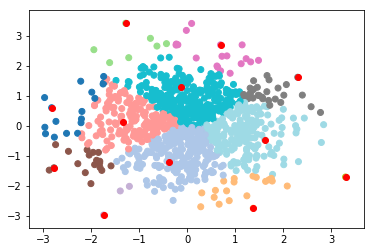

beginning traversal! 1000 items to traverse
checking 551 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


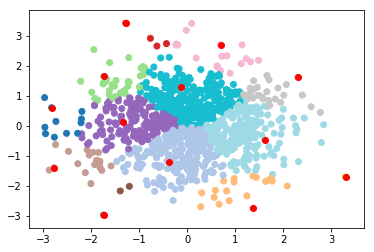

beginning traversal! 1000 items to traverse
checking 615 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


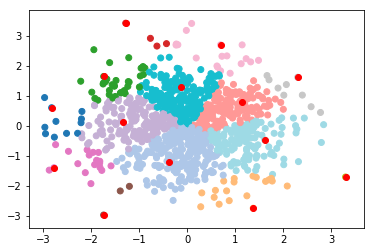

beginning traversal! 1000 items to traverse
checking 538 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


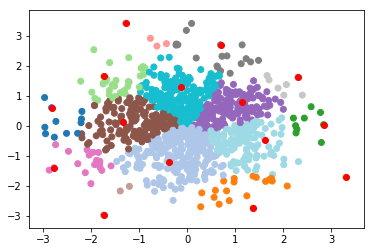

beginning traversal! 1000 items to traverse
checking 546 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


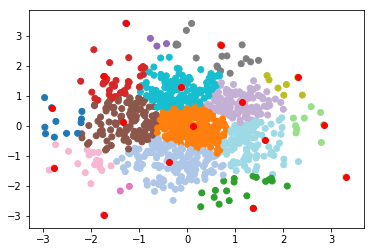

beginning traversal! 1000 items to traverse
checking 353 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


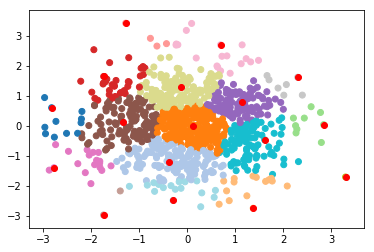

beginning traversal! 1000 items to traverse
checking 405 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


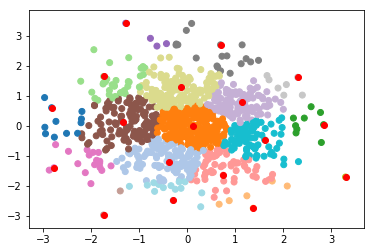

beginning traversal! 1000 items to traverse
checking 404 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


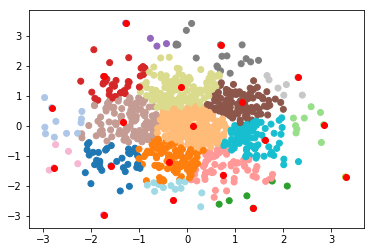

beginning traversal! 1000 items to traverse
checking 491 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


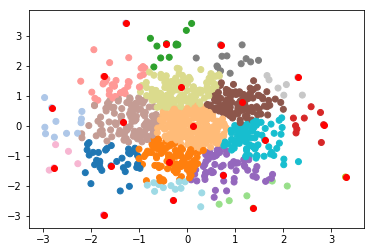

In [103]:
h = hopper(rgauss)
for i in range(20):
    h.hop()
    cells = deepcopy([str(x) for x in h.vcells])
    le = LabelEncoder()
    le.fit(cells)
    cells = le.transform(cells)
    
    #print(cells)
    print(np.unique(cells))
    plt.scatter(rgauss[:,0],rgauss[:,1],c=cells, cmap='tab20')
    plt.scatter(rgauss[h.path,0],rgauss[h.path,1],color='red')
    plt.show()

In [34]:
@interact
def grow(N=(0,100,1)):
    plt.scatter(rgauss[:,0],rgauss[:,1])
    plt.scatter(rgauss[th.path[:N],0],rgauss[th.path[:N],1])
    plt.show()

interactive(children=(IntSlider(value=50, description='N'), Output()), _dom_classes=('widget-interact',))

In [121]:


h = hopper(rgauss)
h.hop(10)
h.hop(20)

beginning traversal! 1000 items to traverse


[534,
 678,
 495,
 258,
 377,
 978,
 611,
 284,
 581,
 722,
 763,
 39,
 968,
 418,
 566,
 795,
 28,
 444,
 962,
 151,
 272,
 41,
 999,
 306,
 899,
 324,
 879,
 769,
 677,
 754]

In [11]:
[len(x) for x in h.vdict.values()]

[19,
 0,
 1,
 16,
 102,
 2,
 0,
 1,
 4,
 21,
 27,
 89,
 19,
 2,
 24,
 94,
 119,
 16,
 0,
 9,
 9,
 8,
 37,
 26,
 65,
 6,
 58,
 46,
 115,
 35]

In [14]:
smaller.obs['wt']

979     20
797      1
742      2
635     17
865    103
738      3
852      1
581      2
401      5
442     22
444     28
174     90
360     20
14       3
891     25
232     95
220    120
70      17
487      1
53      10
183     10
983      9
606     38
961     27
933     66
515      7
255     59
543     47
62     116
9       36
Name: wt, dtype: int64

Trying to set attribute `.obs` of view, making a copy.


Counter({220: 120, 62: 116, 865: 103, 232: 95, 174: 90, 933: 66, 255: 59, 543: 47, 606: 38, 9: 36, 444: 28, 961: 27, 891: 25, 442: 22, 360: 20, 979: 20, 70: 17, 635: 17, 183: 10, 53: 10, 983: 9, 515: 7, 401: 5, 14: 3, 738: 3, 581: 2, 742: 2, 487: 1, 797: 1, 852: 1})


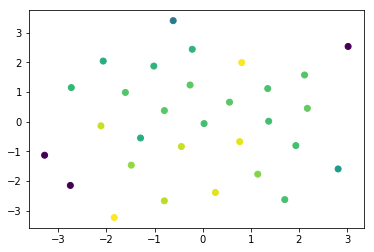

In [13]:
rgauss = sc.AnnData(rgauss)

smaller = e.compress(rgauss, h)
plt.scatter(smaller.X[:,0],smaller.X[:,1], c=h.rs)
plt.show()

In [16]:
smaller.obs['wt']

269    142
486      1
347      4
633      3
373      1
118      4
490      2
35      27
557     92
870      7
268      6
367     28
595    143
83      28
740      2
893     33
617     41
589     34
875      7
363      5
836    101
130      3
984    139
474      2
588     27
519      6
685     23
265     10
293      2
896     77
Name: wt, dtype: int64

In [11]:
sc.pp.neighbors(smaller)

/usr/local/lib/python3.7/site-packages/umap/umap_.py:349: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "../../../../../usr/local/lib/python3.7/site-packages/umap/umap_.py", line 467:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
/usr/local/lib/python3.7/site-packages/numba/compiler.py:725: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File "../../../../../usr/local/lib/python3.7/site-packages/umap/umap_.py", line 350:
@numba.jit()
def fuzzy_simplicial_set(
^

  self.func_ir.loc))
/usr/local/lib/python3.7/site-packages/numba/compiler.py:734: NumbaDeprecationWarning: 
Fall-back from the nopython compilation 

In [14]:
sc.tl.louvain(smaller)

In [22]:
c1=e.filter(smaller, 'louvain',['1'])

In [26]:
expanded = e.expand(c1, rgauss)

[98, 30, 680, 495, 759, 933, 463, 764, 68, 744]
[887, 132, 132, 68, 531, 155, 132, 236, 784, 764, 236, 332, 132, 220, 764, 236, 556, 531, 132, 67, 132, 784, 495, 764, 764, 220, 236, 531, 132, 132, 30, 236, 988, 67, 796, 495, 495, 887, 236, 386, 386, 132, 887, 744, 332, 495, 495, 220, 531, 764, 132, 764, 67, 796, 949, 386, 68, 887, 236, 887, 132, 531, 784, 30, 448, 495, 386, 67, 68, 764, 531, 784, 132, 67, 386, 386, 236, 386, 796, 236, 529, 236, 796, 132, 132, 764, 529, 386, 764, 556, 764, 386, 386, 796, 132, 495, 764, 236, 98, 236, 386, 495, 531, 132, 132, 236, 236, 680, 386, 236, 132, 796, 638, 132, 764, 531, 764, 463, 764, 386, 132, 887, 495, 132, 448, 764, 680, 386, 887, 236, 887, 495, 132, 132, 332, 236, 448, 495, 887, 67, 140, 764, 132, 132, 495, 796, 784, 680, 236, 531, 386, 236, 495, 764, 386, 155, 887, 933, 933, 796, 68, 332, 132, 386, 531, 67, 495, 887, 796, 495, 236, 236, 531, 289, 764, 68, 796, 332, 132, 796, 933, 386, 796, 764, 132, 949, 668, 796, 236, 495, 495, 236, 386, 2

In [19]:
list(smaller.obs['louvain'])

['0',
 '2',
 '2',
 '1',
 '0',
 '1',
 '2',
 '0',
 '2',
 '1',
 '0',
 '1',
 '0',
 '2',
 '2',
 '0',
 '1',
 '2',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '2']

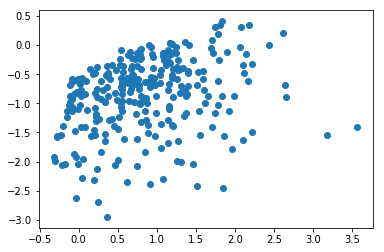

In [27]:
plt.scatter(expanded.X[:,0], expanded.X[:,1])

In [7]:
np.where([x in [1,2] for x in [1,2,3,4,5]])[0]

array([0, 1])

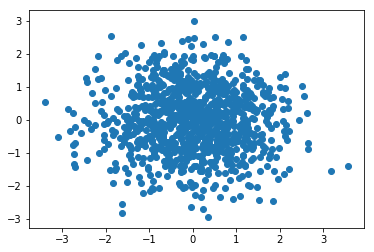

In [8]:
plt.scatter(rgauss.X[:,0],rgauss.X[:,1])